In [113]:
import pandas as pd
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
from datasets import load_from_disk
dataset = load_from_disk("./data/train_dataset/")
test = load_from_disk("./data/test_dataset/")
train_dataset = dataset['train']
val_dataset = dataset['validation']
test_dataset = test['validation']

In [7]:
train_dataset

Dataset({
    features: ['title', 'context', 'question', 'id', 'answers', 'document_id', '__index_level_0__'],
    num_rows: 3952
})

In [9]:
len(train_dataset), len(val_dataset), len(test_dataset)

(3952, 240, 600)

In [8]:
train_dataset.column_names

['title',
 'context',
 'question',
 'id',
 'answers',
 'document_id',
 '__index_level_0__']

### 정답 위치

In [32]:
answer_pos = []
for i in range(len(train_dataset)):
    answer_pos.append(train_dataset[i]['answers']['answer_start'][0])
answer_pos

[235,
 212,
 510,
 625,
 30,
 91,
 68,
 583,
 195,
 861,
 817,
 414,
 86,
 26,
 497,
 524,
 414,
 13,
 228,
 585,
 166,
 142,
 59,
 149,
 263,
 87,
 76,
 321,
 256,
 1135,
 580,
 694,
 372,
 606,
 209,
 124,
 228,
 284,
 68,
 120,
 323,
 1264,
 0,
 602,
 335,
 186,
 663,
 669,
 456,
 332,
 477,
 761,
 426,
 498,
 186,
 268,
 342,
 235,
 153,
 554,
 170,
 11,
 317,
 34,
 809,
 82,
 0,
 501,
 144,
 515,
 1086,
 156,
 501,
 481,
 589,
 142,
 11,
 257,
 579,
 405,
 0,
 1142,
 53,
 214,
 286,
 491,
 171,
 447,
 316,
 340,
 300,
 528,
 230,
 10,
 328,
 58,
 61,
 0,
 380,
 377,
 947,
 132,
 286,
 107,
 261,
 165,
 177,
 328,
 519,
 400,
 257,
 412,
 428,
 385,
 163,
 644,
 81,
 176,
 103,
 1,
 126,
 890,
 439,
 551,
 427,
 415,
 85,
 148,
 91,
 441,
 1107,
 301,
 320,
 276,
 430,
 244,
 202,
 239,
 483,
 73,
 93,
 0,
 351,
 106,
 365,
 804,
 338,
 53,
 693,
 46,
 7,
 95,
 450,
 0,
 70,
 1839,
 197,
 543,
 358,
 152,
 1017,
 442,
 460,
 100,
 122,
 532,
 308,
 190,
 561,
 171,
 84,
 616,
 35,


In [33]:
pos_num = pd.Series(answer_pos).value_counts().sort_index()
pd.set_option('display.max_rows', None)
pos_num

0       69
1        1
3        3
4        3
5       13
6        7
7        4
8        4
9        9
10      10
11       8
12       1
13       4
14       6
15       6
16       6
17       9
18       7
19       4
20      10
21       6
22       6
23       3
24       3
25       7
26       5
27       6
28       3
29       6
30      10
31       6
32       6
33       6
34       3
35       6
36       5
37       5
38       7
39       2
40       5
41       8
42       5
43       2
44       9
45       6
46       7
47      10
48       5
49       5
50       7
51       6
52      11
53       8
54       7
55       5
56       9
57      12
58       6
59       6
60      12
61      15
62       9
63      10
64       4
65       5
66       3
67       7
68       9
69       6
70       7
71      10
72       7
73       4
74       3
75       6
76       6
77      10
78       7
79       3
80       8
81       9
82      11
83       6
84      13
85       7
86      10
87       9
88       7
89       7
90       6
91       7

In [29]:
val_answer_pos = []
for i in range(len(val_dataset)):
    val_answer_pos.append(val_dataset[i]['answers']['answer_start'][0])
val_answer_pos

[284,
 146,
 517,
 1109,
 386,
 408,
 192,
 31,
 625,
 71,
 274,
 901,
 430,
 317,
 1429,
 0,
 162,
 709,
 304,
 536,
 689,
 78,
 366,
 197,
 70,
 354,
 6,
 61,
 585,
 726,
 604,
 317,
 312,
 61,
 192,
 180,
 540,
 978,
 212,
 580,
 1036,
 1424,
 71,
 35,
 135,
 170,
 305,
 377,
 305,
 104,
 81,
 624,
 429,
 13,
 534,
 278,
 255,
 564,
 258,
 89,
 219,
 47,
 0,
 231,
 155,
 915,
 1114,
 555,
 302,
 33,
 277,
 446,
 504,
 435,
 215,
 206,
 121,
 108,
 412,
 75,
 1013,
 101,
 250,
 536,
 386,
 272,
 1222,
 228,
 256,
 522,
 10,
 459,
 209,
 13,
 264,
 83,
 591,
 523,
 520,
 135,
 191,
 476,
 90,
 459,
 790,
 75,
 120,
 1029,
 155,
 637,
 505,
 493,
 530,
 92,
 454,
 61,
 397,
 251,
 67,
 82,
 444,
 331,
 177,
 20,
 333,
 106,
 353,
 84,
 351,
 251,
 870,
 0,
 248,
 34,
 143,
 498,
 1094,
 151,
 34,
 369,
 718,
 0,
 836,
 55,
 48,
 279,
 852,
 42,
 943,
 251,
 317,
 727,
 115,
 186,
 119,
 468,
 835,
 885,
 515,
 185,
 0,
 72,
 435,
 531,
 234,
 811,
 803,
 365,
 357,
 929,
 1190,
 502,
 

In [30]:
val_pos_num = pd.Series(val_answer_pos).value_counts().sort_index()
pd.set_option('display.max_rows', None)
val_pos_num

0       5
6       1
10      1
13      2
14      1
20      1
28      1
31      1
33      2
34      2
35      1
42      1
47      1
48      1
52      1
55      1
58      1
59      1
61      3
63      1
67      1
70      2
71      2
72      1
75      2
78      1
79      1
81      1
82      1
83      1
84      1
89      1
90      1
92      1
101     1
104     1
106     1
108     1
115     1
119     1
120     1
121     1
127     1
135     2
143     1
146     1
151     1
155     2
161     1
162     1
163     1
166     1
170     1
171     1
174     2
177     1
180     1
185     1
186     1
191     1
192     2
197     1
206     1
207     1
209     2
212     1
214     1
215     2
219     1
226     1
228     1
231     1
234     1
242     1
243     1
247     1
248     1
250     1
251     3
255     1
256     1
258     1
264     1
272     1
274     1
277     1
278     1
279     1
284     1
285     1
296     1
301     1
302     2
304     1
305     2
312     1
317     3
327     1
331     1
333     1


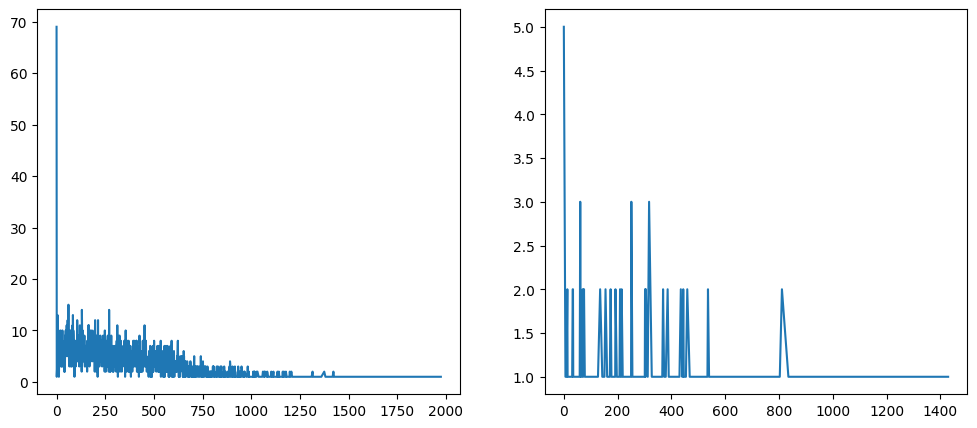

In [37]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(pos_num.index, pos_num.values)
axes[1].plot(val_pos_num.index, val_pos_num.values)
plt.show()

### context 길이

In [43]:
context_len = []
for i in range(len(train_dataset)):
    context_len.append(len(train_dataset[i]['context']))

num_len = pd.Series(context_len).value_counts().sort_index()
pd.set_option('display.max_rows', None)
num_len

512      4
513      5
514      3
515      5
516      5
517     15
518      4
519     11
520      9
521     12
522      9
523     13
524      2
525      6
526      8
527      6
528      9
529      4
530     15
531      6
532      8
533      6
534      4
535     10
536      8
537     11
538      8
539      9
540     12
541      7
542     11
543      5
544      5
545     12
546      5
547      7
548      7
549      7
550      6
551      8
552      6
553     10
554      8
555      6
556      8
557      3
558      6
559      8
560      8
561      9
562     11
563      6
564      5
565      6
566      6
567     10
568      6
569     11
570      5
571      7
572      6
573     12
574      3
575      4
576     10
577     16
578      7
579      6
580      7
581      3
582      7
583      4
584     14
585      3
586      7
587      6
588      8
589      2
590      8
591     10
592      5
593      5
594     12
595     10
596      9
597     10
598      8
599      6
600      8
601      8
602     10

In [45]:
val_context_len = []
for i in range(len(val_dataset)):
    val_context_len.append(len(val_dataset[i]['context']))
val_num_len = pd.Series(val_context_len).value_counts().sort_index()
pd.set_option('display.max_rows', None)
val_num_len

517     1
518     2
519     2
520     1
522     1
527     1
529     1
530     1
531     1
536     2
537     1
538     1
544     1
545     1
546     1
549     1
556     1
558     1
563     1
564     2
570     1
571     1
572     1
573     1
574     1
575     1
577     2
578     1
579     1
581     1
583     2
584     2
585     1
586     1
589     1
591     2
593     1
594     2
597     2
598     1
599     1
603     1
606     1
607     1
608     1
609     1
611     1
612     1
616     2
617     1
625     1
627     1
629     1
630     1
634     1
639     1
640     1
642     2
643     1
646     1
647     1
650     1
651     1
655     1
667     3
670     2
671     1
674     1
680     1
684     1
701     1
703     1
704     3
707     1
710     1
711     1
712     2
714     1
715     1
716     1
717     1
718     1
719     1
721     1
730     1
734     1
747     1
751     1
760     1
763     1
767     1
780     1
789     1
794     1
802     2
805     1
807     1
808     1
813     1
814     1


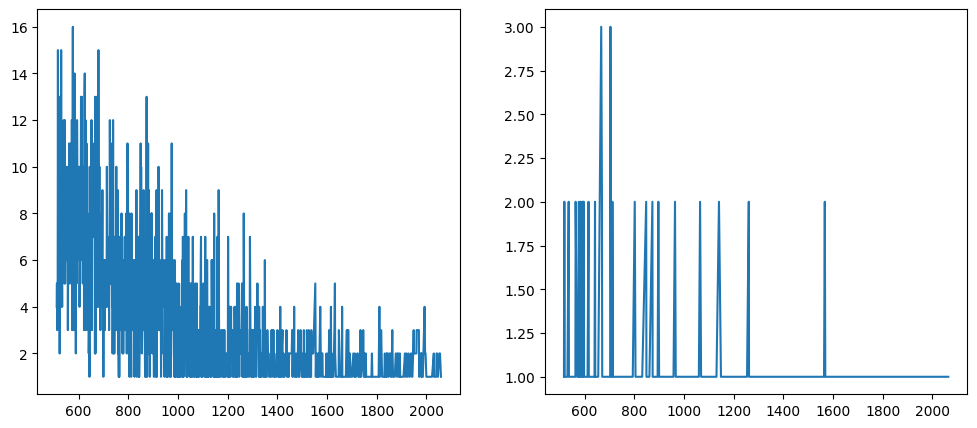

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes[0].plot(num_len.index, num_len.values)
axes[1].plot(val_num_len.index, val_num_len.values)
plt.show()

### retrieval 문서

In [2]:
import pandas as pd

In [26]:
#retrieval = json.load('/data/ephemeral/home/data/wikipedia_documents.json')
retrieval = pd.read_json('/data/ephemeral/home/data/wikipedia_documents.json').transpose()

In [29]:
retrieval

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [4]:
len(retrieval)

60613

In [5]:
retrieval.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [14]:
dup = {}
for i in range(len(retrieval)):
    context = retrieval.iloc[i]['text']
    if dup.get(context) == None:
        dup[context] = [retrieval.iloc[i]['document_id']]
    else:
        dup[context].append(retrieval.iloc[i]['document_id'])
        
n = 0
to_delete = 0
for i, key in enumerate(dup.keys()):
    if len(dup[key])>1:
        print(f"{dup[key]}끼리 동일한 context")
        n += 1
        to_delete += len(dup[key])
print(n, to_delete)

[0, 4554]끼리 동일한 context
[1, 4555]끼리 동일한 context
[2, 4556]끼리 동일한 context
[3, 4557]끼리 동일한 context
[4, 4558]끼리 동일한 context
[5, 4559]끼리 동일한 context
[6, 4560]끼리 동일한 context
[7, 4561]끼리 동일한 context
[8, 4562]끼리 동일한 context
[9, 4563]끼리 동일한 context
[10, 4564]끼리 동일한 context
[11, 4565]끼리 동일한 context
[12, 4566]끼리 동일한 context
[13, 4567]끼리 동일한 context
[14, 4568]끼리 동일한 context
[15, 4569]끼리 동일한 context
[16, 4570]끼리 동일한 context
[17, 4571]끼리 동일한 context
[19, 4573]끼리 동일한 context
[20, 4574]끼리 동일한 context
[21, 4575]끼리 동일한 context
[22, 4576]끼리 동일한 context
[23, 4577]끼리 동일한 context
[24, 4578]끼리 동일한 context
[25, 4579]끼리 동일한 context
[26, 4580]끼리 동일한 context
[27, 4581]끼리 동일한 context
[28, 4582]끼리 동일한 context
[29, 4583]끼리 동일한 context
[30, 4584]끼리 동일한 context
[31, 4585]끼리 동일한 context
[32, 4586]끼리 동일한 context
[33, 4587]끼리 동일한 context
[34, 4588]끼리 동일한 context
[35, 4589]끼리 동일한 context
[36, 4590]끼리 동일한 context
[38, 4592]끼리 동일한 context
[39, 4593]끼리 동일한 context
[41, 4595]끼리 동일한 context
[42, 4596]끼리 동일한 context
[43, 4597]

In [20]:
new_retrieval = []
for chunk in dup.values():
    for ids in chunk[1:]:
        retrieval = retrieval[retrieval['document_id'] != ids]
retrieval

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
60608,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
60609,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
60610,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
60611,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [23]:
retrieval.reset_index(drop=True)

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4
...,...,...,...,...,...,...,...,...
56732,"오키나와 현립 박물관·미술관( , Okinawa Prefectural Museum ...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60608
56733,"1936년 7월, 오키나와현 교육위원회 부설 향토 박물관(沖縄県教育会附設郷土博物館)...",위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60609
56734,박물관은 개관 10주년이되는 2017년에 관의 애칭 및 마스코트를 일반인에게 공모했...,위키피디아,None,None,오키나와 현립 박물관·미술관,None,None,60610
56735,단결권 및 단체교섭권 협약(Right to Organise and Collectiv...,위키피디아,None,None,단결권 및 단체교섭권 협약,None,None,60611


In [24]:
retrieval.to_csv('./new_wikipedia_document.csv')

## 한글, 영어, 한자, 일어, 문장부호 비율 분석

In [31]:
import re
pattern = re.compile("[가-힣]")
text = '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.'
text = ''.join(text.split())
norm_text = pattern.sub('', text)
norm_text

'(UnitedStatesSenate)..2100.6,2501/3.'

In [102]:
# 한글만 보기
def get_kor():
    pattern = re.compile("[가-힣]")
    return pattern
    
# 영어만 보기
def get_eng():
    pattern = re.compile("[A-Z]")
    return pattern

# 한자만 보기
def get_chi():
    pattern = re.compile("[一-龯]")
    return pattern
    
# 일본어만 보기
def get_jap():
    pattern = re.compile("[ぁ-んァ-ン]")
    return pattern
    
# 숫자만 보기
def get_num():
    pattern = re.compile("[0-9]")
    return pattern

# 문장부호만 보기
def get_punc():
    pattern = re.compile("[^가-힣A-Z一-龯ぁ-んァ-ン0-9]")
    return pattern

# html만 보기
def get_html():
    ...
    
# url만 보기
def get_url():
    ...
    
# 걸러내기
def filtering(targets, pattern):
    total_targets = 0
    for target in targets:
        target_text = ''.join(target.split())
        normed_target = re.findall(pattern, target_text)
        total_targets += len(normed_target)
    return total_targets

In [94]:
pattern = get_kor()
text = '미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국 의회의 상원이다.\n\n미국 부통령이 상원의장이 된다. 각 주당 2명의 상원의원이 선출되어 100명의 상원의원으로 구성되어 있다. 임기는 6년이며, 2년마다 50개주 중 1/3씩 상원의원을 새로 선출하여 연방에 보낸다.'
result = filtering([text], pattern)
result

미국상의원또는미국상원(UnitedStatesSenate)은양원제인미국의회의상원이다.미국부통령이상원의장이된다.각주당2명의상원의원이선출되어100명의상원의원으로구성되어있다.임기는6년이며,2년마다50개주중1/3씩상원의원을새로선출하여연방에보낸다.
['미', '국', '상', '의', '원', '또', '는', '미', '국', '상', '원', '은', '양', '원', '제', '인', '미', '국', '의', '회', '의', '상', '원', '이', '다', '미', '국', '부', '통', '령', '이', '상', '원', '의', '장', '이', '된', '다', '각', '주', '당', '명', '의', '상', '원', '의', '원', '이', '선', '출', '되', '어', '명', '의', '상', '원', '의', '원', '으', '로', '구', '성', '되', '어', '있', '다', '임', '기', '는', '년', '이', '며', '년', '마', '다', '개', '주', '중', '씩', '상', '원', '의', '원', '을', '새', '로', '선', '출', '하', '여', '연', '방', '에', '보', '낸', '다']


96

In [162]:
train_contexts = list(set(train_dataset['context']))
val_contexts = list(set(val_dataset['context']))
train_querys = list(set(train_dataset['question'] + val_dataset['question']))
val_querys = list(set(val_dataset['question'] + val_dataset['question']))
train_answers = list(set([answer['text'][0] for answer in train_dataset['answers']]))
val_answers = list(set([answer['text'][0] for answer in val_dataset['answers']]))

### context

In [100]:
len(train_contexts), len(val_contexts)

(3340, 235)

In [112]:
# 한국어만
pattern = get_kor()
train_contexts_kor_result = filtering(train_contexts, pattern)
val_contexts_kor_result = filtering(val_contexts, pattern)
train_contexts_kor_result, val_contexts_kor_result

(2139920, 151431)

In [111]:
# 영어만
pattern = get_eng()
train_contexts_eng_result = filtering(train_contexts, pattern)
val_contexts_eng_result = filtering(val_contexts, pattern)
train_contexts_eng_result, val_contexts_eng_result

(6573, 356)

In [110]:
# 한자만
pattern = get_chi()
train_contexts_chi_result = filtering(train_contexts, pattern)
val_contexts_chi_result = filtering(val_contexts, pattern)
train_contexts_chi_result, val_contexts_chi_result

(6020, 462)

In [109]:
# 일어만
pattern = get_jap()
train_contexts_jap_result = filtering(train_contexts, pattern)
val_contexts_jap_result = filtering(val_contexts, pattern)
train_contexts_jap_result, val_contexts_jap_result

(186, 19)

In [108]:
# 문장부호만
pattern = get_punc()
train_contexts_punc_result = filtering(train_contexts, pattern)
val_contexts_punc_result = filtering(val_contexts, pattern)
train_contexts_punc_result, val_contexts_punc_result

(153761, 10826)

In [185]:
train_contexts_url_result = 1
val_contexts_url_result = 0

시각화

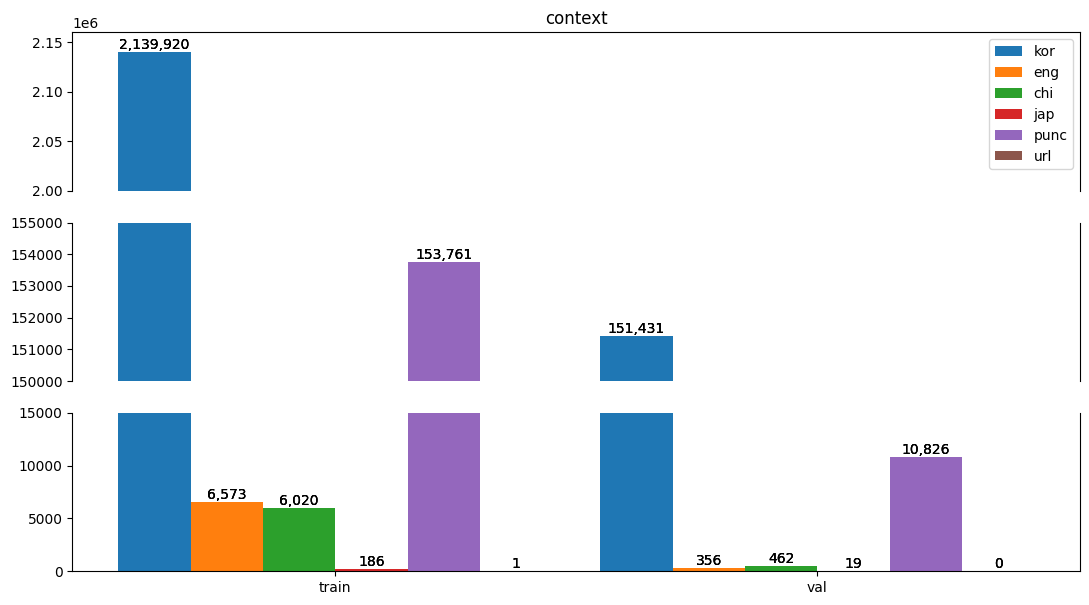

In [186]:
fig, ax = plt.subplots(3, 1, figsize=(13, 7))
ax[2].set_ylim(0, 15000)
ax[1].set_ylim(150000, 155000)
ax[0].set_ylim(2000000, 2160000)

ax[0].spines.bottom.set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].spines.top.set_visible(False)
ax[2].xaxis.tick_bottom()

x = np.arange(2)
width=0.15
train_contexts = [train_contexts_kor_result, train_contexts_eng_result, train_contexts_chi_result, train_contexts_jap_result, train_contexts_punc_result, train_contexts_url_result]
val_contexts = [val_contexts_kor_result, val_contexts_eng_result, val_contexts_chi_result, val_contexts_jap_result, val_contexts_punc_result, val_contexts_url_result]
labels = ['kor', 'eng', 'chi', 'jap', 'punc', 'url']

barss = []
for i, label in enumerate(labels):
    barss.append(ax[0].bar(x+i*width-(len(train_contexts)/2)*width+width/2, [train_contexts[i], val_contexts[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[1].bar(x+i*width-(len(train_contexts)/2)*width+width/2, [train_contexts[i], val_contexts[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[2].bar(x+i*width-(len(train_contexts)/2)*width+width/2, [train_contexts[i], val_contexts[i]], width=width, label=label))

# Adding text on top of each bar
for bars in barss:
    for bar in bars:
        yval = bar.get_height()
        if yval>155000:
            ax[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        elif yval>15000:
            ax[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        else:
            ax[2].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        
ax[0].set_title('context')
ax[2].set_xticks(x)
ax[2].set_xticklabels(['train', 'val'])
ax[0].legend()
plt.show()

### query

In [163]:
len(train_querys), len(val_querys)

(4192, 240)

In [166]:
# 한국어만
pattern = get_kor()
train_querys_kor_result = filtering(train_querys, pattern)
val_querys_kor_result = filtering(val_querys, pattern)
train_querys_kor_result, val_querys_kor_result

(91595, 5221)

In [167]:
# 영어만
pattern = get_eng()
train_querys_eng_result = filtering(train_querys, pattern)
val_querys_eng_result = filtering(val_querys, pattern)
train_querys_eng_result, val_querys_eng_result

(191, 5)

In [170]:
# 한자만
pattern = get_chi()
train_querys_chi_result = filtering(train_querys, pattern)
val_querys_chi_result = filtering(val_querys, pattern)
train_querys_chi_result, val_querys_chi_result

(1, 0)

In [172]:
# 일어만
pattern = get_jap()
train_querys_jap_result = filtering(train_querys, pattern)
val_querys_jap_result = filtering(val_querys, pattern)
train_querys_jap_result, val_querys_jap_result

(0, 0)

In [175]:
# 문장부호만
pattern = get_punc()
train_querys_punc_result = filtering(train_querys, pattern)
val_querys_punc_result = filtering(val_querys, pattern)
train_querys_punc_result, val_querys_punc_result

(4749, 268)

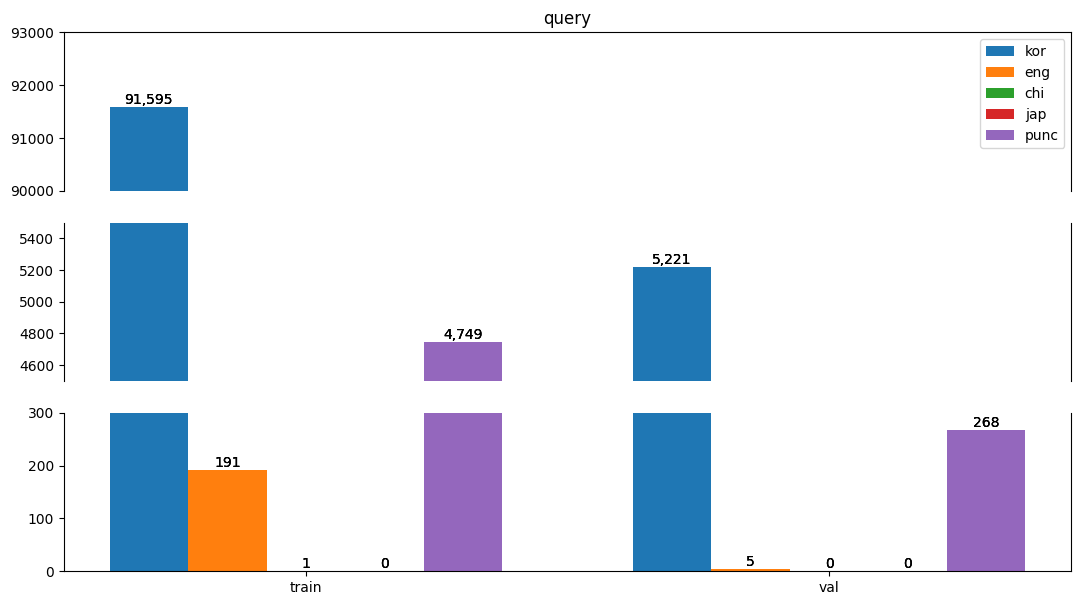

In [183]:
fig, ax = plt.subplots(3, 1, figsize=(13, 7))
ax[2].set_ylim(0, 300)
ax[1].set_ylim(4500, 5500)
ax[0].set_ylim(90000, 93000)

ax[0].spines.bottom.set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].spines.top.set_visible(False)
ax[2].xaxis.tick_bottom()

x = np.arange(2)
width=0.15
train_querys = [train_querys_kor_result, train_querys_eng_result, train_querys_chi_result, train_querys_jap_result, train_querys_punc_result]
val_querys = [val_querys_kor_result, val_querys_eng_result, val_querys_chi_result, val_querys_jap_result, val_querys_punc_result]
labels = ['kor', 'eng', 'chi', 'jap', 'punc']

barss = []
for i, label in enumerate(labels):
    barss.append(ax[0].bar(x+i*width-(5/2)*width+width/2, [train_querys[i], val_querys[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[1].bar(x+i*width-(5/2)*width+width/2, [train_querys[i], val_querys[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[2].bar(x+i*width-(5/2)*width+width/2, [train_querys[i], val_querys[i]], width=width, label=label))

# Adding text on top of each bar
for bars in barss:
    for bar in bars:
        yval = bar.get_height()
        if yval>90000:
            ax[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        elif yval>4500:
            ax[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        else:
            ax[2].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        
ax[0].set_title('query')
ax[2].set_xticks(x)
ax[2].set_xticklabels(['train', 'val'])
ax[0].legend()
plt.show()

url, html tag 없음

### answer

In [164]:
len(train_answers), len(val_answers)

(3622, 240)

In [165]:
# 한국어만
pattern = get_kor()
train_answers_kor_result = filtering(train_answers, pattern)
val_answers_kor_result = filtering(val_answers, pattern)
train_answers_kor_result, val_answers_kor_result

(17507, 1203)

In [169]:
# 영어만
pattern = get_eng()
train_answers_eng_result = filtering(train_answers, pattern)
val_answers_eng_result = filtering(val_answers, pattern)
train_answers_eng_result, val_answers_eng_result

(213, 5)

In [171]:
# 한자만
pattern = get_chi()
train_answers_chi_result = filtering(train_answers, pattern)
val_answers_chi_result = filtering(val_answers, pattern)
train_answers_chi_result, val_answers_chi_result

(120, 18)

In [173]:
# 일어만
pattern = get_jap()
train_answers_jap_result = filtering(train_answers, pattern)
val_answers_jap_result = filtering(val_answers, pattern)
train_answers_jap_result, val_answers_jap_result

(14, 0)

In [174]:
# 문장부호만
pattern = get_punc()
train_answers_punc_result = filtering(train_answers, pattern)
val_answers_punc_result = filtering(val_answers, pattern)
train_answers_punc_result, val_answers_punc_result

(1097, 120)

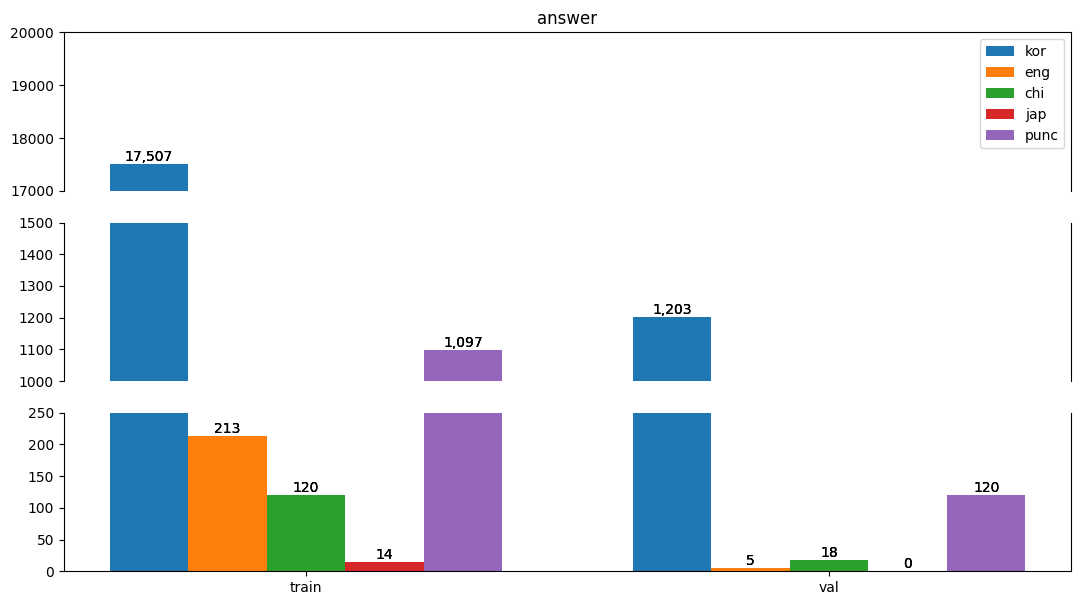

In [182]:
fig, ax = plt.subplots(3, 1, figsize=(13, 7))
ax[2].set_ylim(0, 250)
ax[1].set_ylim(1000, 1500)
ax[0].set_ylim(17000, 18000)

ax[0].spines.bottom.set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].spines.top.set_visible(False)
ax[2].xaxis.tick_bottom()

x = np.arange(2)
width=0.15
train_answers = [train_answers_kor_result, train_answers_eng_result, train_answers_chi_result, train_answers_jap_result, train_answers_punc_result]
val_answers = [val_answers_kor_result, val_answers_eng_result, val_answers_chi_result, val_answers_jap_result, val_answers_punc_result]
labels = ['kor', 'eng', 'chi', 'jap', 'punc']

barss = []
for i, label in enumerate(labels):
    barss.append(ax[0].bar(x+i*width-(5/2)*width+width/2, [train_answers[i], val_answers[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[1].bar(x+i*width-(5/2)*width+width/2, [train_answers[i], val_answers[i]], width=width, label=label))
for i, label in enumerate(labels):
    barss.append(ax[2].bar(x+i*width-(5/2)*width+width/2, [train_answers[i], val_answers[i]], width=width, label=label))

# Adding text on top of each bar
for bars in barss:
    for bar in bars:
        yval = bar.get_height()
        if yval>17000:
            ax[0].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        elif yval>1000:
            ax[1].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        else:
            ax[2].text(bar.get_x() + bar.get_width() / 2, yval, f'{yval:,}', va='bottom', ha='center')
        
ax[0].set_title('answer')
ax[2].set_xticks(x)
ax[2].set_xticklabels(['train', 'val'])
ax[0].legend()
plt.show()

### wikipeida_document.json

In [191]:
retrieval = pd.read_json('/data/ephemeral/home/data/wikipedia_documents.json').transpose()

In [193]:
retrieval.head()

,text,corpus_source,url,domain,title,author,html,document_id
0,"이 문서는 나라 목록이며, 전 세계 206개 나라의 각 현황과 주권 승인 정보를 개...",위키피디아,TODO,None,나라 목록,None,None,0
1,이 목록에 실린 국가 기준은 1933년 몬테비데오 협약 1장을 참고로 하였다. 협정...,위키피디아,TODO,None,나라 목록,None,None,1
2,현 서울특별시 종로구 서린동 (구 일제 강점기 경기도 경성부 서린정) 출신이다. 친...,위키피디아,TODO,None,백남준,None,None,2
3,"아오조라 문고(靑空文庫, あおぞらぶんこ|아오조라 분고)는 ‘일본어판 구텐베르크 프로...",위키피디아,TODO,None,아오조라 문고,None,None,3
4,저자 사망 이후 50년이 지나 저작권이 소멸한 메이지 시대부터 쇼와 시대 초기까지의...,위키피디아,TODO,None,아오조라 문고,None,None,4


In [ ]:
onlyref = 0
only_ref = 0    # /ref
both = 0
html = 0

for i in range(len(retrieval)):
    context = retrieval.iloc[i]['text']
    if '<ref>' in context or '</ref>' in context or '<REF>' in context or '</REF>' in context or '<html>' in context:
        if ('<ref>' in context and '</ref>' in context) or ('<REF>' in context and '</REF>' in context):
            both += 1
        elif '<ref>' in context or '<REF>' in context:
            onlyref += 1
        else:
            only_ref += 1
onlyref, only_ref, both

In [194]:
retrieval = [retrieval.iloc[i]['text'] for i in range(len(retrieval))]

In [195]:
# 한국어만
pattern = get_kor()
wikipedia_kor_result = filtering(retrieval, pattern)
wikipedia_kor_result

28499371

In [196]:
# 영어만
pattern = get_eng()
wikipedia_eng_result = filtering(retrieval, pattern)
wikipedia_eng_result

574289

In [197]:
# 한자만
pattern = get_chi()
wikipedia_chi_result = filtering(retrieval, pattern)
wikipedia_chi_result

561579

In [198]:
# 일어만
pattern = get_jap()
wikipedia_jap_result = filtering(retrieval, pattern)
wikipedia_jap_result

29072

In [199]:
# 문장부호만
pattern = get_punc()
wikipedia_punc_result = filtering(retrieval, pattern)
wikipedia_punc_result

4290383

/tmp/ipykernel_42005/429017565.py:36: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax[0].legend()


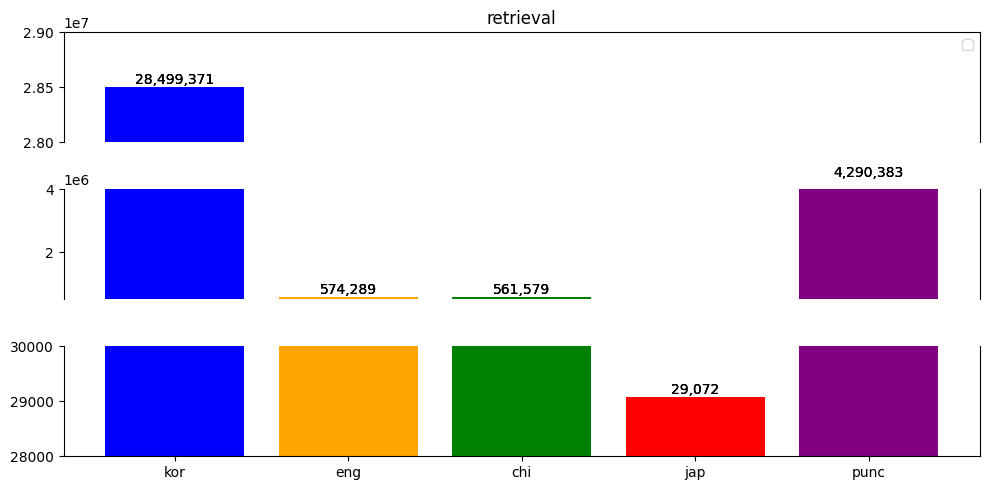

In [227]:
fig, ax = plt.subplots(3, 1, figsize=(10, 5))
ax[2].set_ylim(28000, 30000)
ax[1].set_ylim(500000, 4000000)
ax[0].set_ylim(28000000, 29000000)

ax[0].spines.bottom.set_visible(False)
ax[0].get_xaxis().set_visible(False)

ax[1].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].get_xaxis().set_visible(False)

ax[2].spines.top.set_visible(False)
ax[2].xaxis.tick_bottom()

docs = [wikipedia_kor_result, wikipedia_eng_result, wikipedia_chi_result, wikipedia_jap_result, wikipedia_punc_result]

labels = ['kor', 'eng', 'chi', 'jap', 'punc']
clist = ['blue', 'Orange', 'green', 'red', 'purple']
for i in range(3):
    bars = ax[i].bar(labels, docs, color=clist)
    for j, bar in enumerate(bars):
        height = bar.get_height()
        if height>28000000:
            ax[0].text(bar.get_x() + bar.get_width()/2, height,
                   f'{height:,}', ha='center', va='bottom')
        elif height>500000:
            ax[1].text(bar.get_x() + bar.get_width()/2, height,
                   f'{height:,}', ha='center', va='bottom')
        else:
            ax[2].text(bar.get_x() + bar.get_width()/2, height,
                   f'{height:,}', ha='center', va='bottom')
            
        
ax[0].set_title('retrieval')
ax[0].legend()
plt.tight_layout()
plt.show()